<a href="https://colab.research.google.com/github/dandekarvaishali01/Data-Science-Project/blob/main/Online_shopping__Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Aug 22nd and 23rd

#### Online shopping Customer Segmentation

Problem statement

calculate the customer Value
1: Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary)

Recency, frequency, monetary value (RFM) is a model used in marketing analysis that
segments a company’s consumer base by their purchasing patterns or habits. In particular,
it evaluates customers’ recency (how long ago they made a purchase),
frequency (how often they make purchases), and monetary value (how much money they spend).

2: Segment (Group/Cluster) Identify trends for Day, Month, Season, Time by Invoice count

3 Recommendation  engine FINDING product for customer.

### Assignment
(1)Find the CLTV -- customer life time valuation
(2)Top 10 selling products.
(3)Top selling products country wise.
(4)Association Rule mining- Market basket analysis  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
original_data=pd.read_excel("online_shopping.xlsx")

In [ ]:
df=original_data.copy()

In [ ]:
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
lower          540093
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

(1)Customer segregation on the basis of buying pattern-- RFM (Recency, Frequency, Monetary)

In [ ]:
df1=df.drop(["StockCode","lower","Description","Country"],axis=1)

In [ ]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [ ]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [ ]:
df1.dropna(axis=0,inplace=True)

In [ ]:
df1.shape

(406829, 5)

In [ ]:
df1.isnull().sum().sum()

0

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [ ]:
# we can find the free items info

In [ ]:
df1[df1["UnitPrice"]==0]["UnitPrice"]

9302      0.0
33576     0.0
40089     0.0
47068     0.0
47070     0.0
56674     0.0
86789     0.0
130188    0.0
139453    0.0
145208    0.0
157042    0.0
187613    0.0
198383    0.0
279324    0.0
282912    0.0
285657    0.0
298054    0.0
314745    0.0
314746    0.0
314747    0.0
314748    0.0
358655    0.0
361825    0.0
379913    0.0
395529    0.0
420404    0.0
436428    0.0
436597    0.0
436961    0.0
439361    0.0
446125    0.0
446793    0.0
446794    0.0
454463    0.0
454464    0.0
479079    0.0
479546    0.0
480649    0.0
485985    0.0
502122    0.0
Name: UnitPrice, dtype: float64

In [ ]:
df1[df1["UnitPrice"]==0].head(100)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [ ]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [ ]:
# just discard the return item
df1=df1[df1["Quantity"]>0]

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00


In [ ]:
# create a column total
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]

In [ ]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [ ]:
df2=df1.drop(["Quantity","UnitPrice"],axis=1)

In [ ]:
df2.head(10)

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34
5,536365,2010-12-01 08:26:00,17850.0,15.30
6,536365,2010-12-01 08:26:00,17850.0,25.50
7,536366,2010-12-01 08:28:00,17850.0,11.10
8,536366,2010-12-01 08:28:00,17850.0,11.10
9,536367,2010-12-01 08:34:00,13047.0,54.08


In [ ]:
df2["Total"].value_counts()

15.00      20082
17.70       9174
16.50       8490
10.20       8028
19.80       7625
           ...  
1305.60        1
277.92         1
481.50         1
89.64          1
66.36          1
Name: Total, Length: 2940, dtype: int64

In [ ]:
# we will apply groupby function -- to generate the final invoice-- to merge the duplicate invoive no.

In [ ]:
df_final=df2.groupby(["InvoiceNo","InvoiceDate","CustomerID"]).agg({"Total":"sum"}).reset_index()
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60
18562,581584,2011-12-09 12:25:00,13777.0,140.64
18563,581585,2011-12-09 12:31:00,15804.0,329.05
18564,581586,2011-12-09 12:49:00,13113.0,339.20


In [ ]:
max(df_final["Total"])

168469.6

In [ ]:
# Recency frequency monetary

In [ ]:
#Recency = Last business date - recent purchase date(cutomer)

SyntaxError: invalid syntax (3668565376.py, line 1)

In [ ]:
# last  business date
max(df_final["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [ ]:
min(df_final["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

In [ ]:
# basically we have 1 year data set

last business date as per data set= Dec 9th 2011.

In [ ]:
# we will assign 1 day more in our latest business date(last business date)

In [ ]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

Recency = Late business date - last purchase date as per invoice date(cutomer id).
frequency= counting of invoice no. with respect to the customer id.
monetary=sum of total w.r.to customer id

In [ ]:
df_final.head(2)

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20


In [ ]:
RFM_score=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "InvoiceNo":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()

In [ ]:
RFM_score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [ ]:
# Rename the column
RFM_score=RFM_score.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [ ]:
# rank function-- what ever rank we get please consider it as a marks

In [ ]:
RFM_score["R_Marks"]=RFM_score["Recency"].rank(ascending=False)
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R_Marks
0,12346.0,325,1,77183.60,162.5
1,12347.0,2,7,4310.00,4156.5
2,12348.0,75,4,1797.24,1646.0
3,12349.0,18,1,1757.55,3209.5
4,12350.0,310,1,334.40,227.5


In [ ]:
RFM_score["F_Marks"]=RFM_score["Frequency"].rank(ascending=True)
RFM_score["M_Marks"]=RFM_score["Monetary"].rank(ascending=True)
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [ ]:
# lets convert yhe R marks,F marks, M marks as percentile mark.. out of 100 marks

In [ ]:
RFM_score["R_final"]=(RFM_score["R_Marks"]/RFM_score["R_Marks"].max())*100
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,R_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767


In [ ]:
RFM_score["F_final"]=(RFM_score["F_Marks"]/RFM_score["F_Marks"].max())*100
RFM_score["M_final"]=(RFM_score["M_Marks"]/RFM_score["M_Marks"].max())*100
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546


In [ ]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546


In [ ]:
# Generic Model--- not dedicated to this dataset

In [ ]:
# Capital equipment-- large machineries,car,medical devices, washing machine
# consuambles---

In [ ]:
RFM=RFM_score.copy()

In [ ]:
RFM["RFM_SUM"]=0.15*RFM["R_final"]+0.25*RFM["F_final"]+0.60*RFM["M_final"]

In [ ]:
RFM.head(2)

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.6,162.5,746.5,4330.0,3.759833,17.204425,99.792579,64.740629
1,12347.0,2,7,4310.0,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327,91.166222


In [ ]:
RFM=RFM.round(2)
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,64.74
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.17
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,69.26
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,61.16
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,22.10


In [ ]:
# we can create 4 groups/clusters on the basis of RFM_SUM

In [ ]:
# percentiles -- basis clustering

In [ ]:
quant100=RFM["RFM_SUM"].quantile(q=[0.25,0.50,0.75])

In [ ]:
quant100

0.25    27.095
0.50    48.840
0.75    72.250
Name: RFM_SUM, dtype: float64

In [ ]:
quant200=RFM["RFM_SUM"].quantile(q=[0.10,0.20,0.60,0.80,0.90])

In [ ]:
quant200

0.1    15.730
0.2    23.362
0.6    58.436
0.8    76.968
0.9    86.364
Name: RFM_SUM, dtype: float64

In [ ]:
# lets do the visualization

In [ ]:
# ECDF -- emperical cummulative distribution function

<Axes: xlabel='RFM_SUM', ylabel='Proportion'>

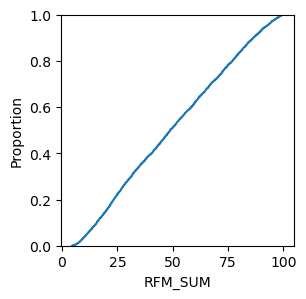

In [ ]:
plt.figure(figsize=(3,3))
sns.ecdfplot(data=RFM["RFM_SUM"])

In [ ]:
# silver,Gold,Diamond,Platinum

In [ ]:
def loyality(x):
    if x<=27:
        return "Silver"
    elif x<=48:
        return "Gold"
    elif x<=72:
        return "Diamond"
    else:
        return "Platinum"

In [ ]:
RFM["loyality"]=RFM["RFM_SUM"].apply(loyality)

In [ ]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,R_final,F_final,M_final,RFM_SUM,loyality
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,64.74,Diamond
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.17,Platinum
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,69.26,Diamond
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,61.16,Diamond
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,22.10,Silver


In [ ]:
RFM["loyality"].value_counts()

Diamond     1113
Platinum    1101
Silver      1080
Gold        1045
Name: loyality, dtype: int64

In [ ]:
#kmeans clustering

In [ ]:
Newdata=RFM["RFM_SUM"]
Newdata

0       64.74
1       91.17
2       69.26
3       61.16
4       22.10
        ...  
4334    13.33
4335     8.74
4336    31.90
4337    86.45
4338    69.47
Name: RFM_SUM, Length: 4339, dtype: float64

In [ ]:
Newdata=pd.DataFrame(Newdata)
Newdata

,RFM_SUM
0,64.74
1,91.17
2,69.26
3,61.16
4,22.10
...,...
4334,13.33
4335,8.74
4336,31.90
4337,86.45


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans1=KMeans(max_iter=100,random_state=100,n_clusters=4)
y_means=kmeans1.fit_predict(Newdata)
y_means

array([1, 3, 1, ..., 0, 3, 1])

In [ ]:
RFM["Cluster"]=kmeans1.labels_

In [ ]:
RFM.head(20)

,CustomerID,Recency,Frequency,Monetary,R_Marks,F_Marks,M_Marks,R_final,F_final,M_final,RFM_SUM,loyality,Cluster
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,64.74,Diamond,1
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,91.17,Platinum,3
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,69.26,Diamond,1
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,61.16,Diamond,1
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,22.10,Silver,2
5,12352.0,36,8,2506.04,2502.5,3828.0,3638.0,57.90,88.22,83.84,81.05,Platinum,3
6,12353.0,204,1,89.00,725.5,746.5,117.0,16.79,17.20,2.70,8.44,Silver,2
7,12354.0,232,1,1079.40,602.5,746.5,2780.0,13.94,17.20,64.07,44.83,Gold,0
8,12355.0,214,1,459.40,672.5,746.5,1660.0,15.56,17.20,38.26,29.59,Gold,2
9,12356.0,22,3,2811.43,3037.5,2581.5,3739.0,70.28,59.50,86.17,77.12,Platinum,3


In [ ]:
RFM["Cluster"].value_counts()

2    1261
0    1122
1    1032
3     924
Name: Cluster, dtype: int64

In [ ]:
RFM["loyality"].value_counts()

Diamond     1113
Platinum    1101
Silver      1080
Gold        1045
Name: loyality, dtype: int64

In [ ]:
# elbow visualization-- assignment

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
labels=kmeans1.labels_
silhouette_score(Newdata,labels)

0.5648914331362057

In [ ]:
# second gold is to identify the business trend as per day,month,season,morning evening...

In [ ]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [ ]:
df_final1=df_final.copy()

In [ ]:
df_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18566 non-null  int64         
 1   InvoiceDate  18566 non-null  datetime64[ns]
 2   CustomerID   18566 non-null  float64       
 3   Total        18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 580.3 KB


In [ ]:
# extration of day,month,time.. etc from datetime columns

In [ ]:
import datetime as dt

In [ ]:
df_final1["Day"]=df_final1["InvoiceDate"].dt.day_name()
df_final1["Month_name"]=df_final1["InvoiceDate"].dt.month_name()
df_final1["Month"]=df_final1["InvoiceDate"].dt.month
df_final1["Hour"]=df_final1["InvoiceDate"].dt.hour

In [ ]:
df_final1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month_name,Month,Hour
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,December,12,8
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,December,12,8
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,December,12,8
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,December,12,8
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,December,12,8


In [ ]:
df_final1["Day"].value_counts()

Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: Day, dtype: int64

In [ ]:
def cal_season(x):
    if x in[10,11,12,1]:
        return "Winter"
    elif x in [2,3]:
        return "Spring"
    elif x in [4,5,6]:
        return "Summer"
    else:
        return "Monsoon"

In [ ]:
def cal_timing(x):
    if x in range(1,4):
        return "Late Night"
    elif x in range(4,12):
        return "Morning"
    elif x in range(12,16):
        return "Afternoon"
    else:
        return "Evening"

In [ ]:
df_final1["Season"]=df_final1["Month"].apply(cal_season)

In [ ]:
df_final1["Timing"]=df_final1["Hour"].apply(cal_timing)

In [ ]:
df_final1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month_name,Month,Hour,Season,Timing
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,December,12,8,Winter,Morning
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,December,12,8,Winter,Morning
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,December,12,8,Winter,Morning
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,December,12,8,Winter,Morning
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,December,12,8,Winter,Morning


In [ ]:
df_final1["Season"].value_counts()

Winter     7762
Monsoon    4371
Summer     4106
Spring     2327
Name: Season, dtype: int64

In [ ]:
df_final1["Timing"].value_counts()

Afternoon    10095
Morning       6489
Evening       1982
Name: Timing, dtype: int64

In [ ]:
# assignement ---
#calculate the weekday and weekend
# plot the Coutplot, Bar plot,Pie plot as per.. day, month,season,timing weekend...

# RECOMMENDATION ENGINE

In [ ]:
# COLLABORATIVE FILTERING ---- degree of similarities between the customer, viewer
Ram--- a,b,c,d,e
Seema--- a,b,c,d,k
recommend movie e to seema
recommend movie k to Ram

In [ ]:
#CONTENT BASED FILTERING--- Content of PUSHPA movie--  story line,director,actor,acress, family drama

In [ ]:
# HYBRID FILTERING ---meta collaboration content

# #COLLABORATIVE FILTERING-- approach

In [ ]:
df100=original_data.copy()

In [ ]:
df100.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df100.isnull().sum()

InvoiceNo           0
StockCode           0
lower          540093
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df100=df100.drop(["lower"],axis=1)

In [ ]:
df100=df100.dropna(axis=0)
df100.isnull().sum().sum()

0

In [ ]:
# step 1 create the pivot_table -- matrix(customer ID and Stock code)

In [ ]:
custID_matrix=df100.pivot_table(index="CustomerID",columns="StockCode",values="Quantity",aggfunc="sum")

In [ ]:
custID_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
# applying mapping function to change nan to 0

In [ ]:
custID_matrix=custID_matrix.applymap( lambda x:1 if x>0 else 0)
custID_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# step 2 :- we will find the degree of similarity between the customer
# use a function cosine_similarities

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity=cosine_similarity(custID_matrix)

In [ ]:
similarity.shape

(4372, 4372)

In [ ]:
similarity

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.06302187, ..., 0.11377602, 0.10936441,
        0.01282789],
       [0.        , 0.06302187, 1.        , ..., 0.        , 0.17090475,
        0.08326911],
       ...,
       [0.        , 0.11377602, 0.        , ..., 1.        , 0.01780047,
        0.        ],
       [0.        , 0.10936441, 0.17090475, ..., 0.01780047, 1.        ,
        0.09633351],
       [0.        , 0.01282789, 0.08326911, ..., 0.        , 0.09633351,
        1.        ]])

In [ ]:
similarity[90]

array([0.        , 0.08549917, 0.09249946, ..., 0.        , 0.16720631,
       0.        ])

In [ ]:
sorted(similarity[90],reverse=True)

[1.0,
 0.39852669849304295,
 0.3360672201667223,
 0.3076976944152481,
 0.2878618594532406,
 0.2840286409986905,
 0.2733066872302625,
 0.27136385947023145,
 0.2608969660436018,
 0.260359587582133,
 0.26035958758213296,
 0.2585177720346051,
 0.25788600255038785,
 0.2510482226267169,
 0.2487027691989384,
 0.24549951047446422,
 0.23335334047877918,
 0.23157109275259727,
 0.228629598286551,
 0.2259355204958592,
 0.22389255735252045,
 0.22348267517713433,
 0.22140372138502384,
 0.21917850187980234,
 0.21917850187980234,
 0.2172315411805112,
 0.21713578721419133,
 0.21505687158090042,
 0.21397888548644758,
 0.21363273446095687,
 0.2125727305545118,
 0.2120181879653131,
 0.20745595841899625,
 0.20567663600479225,
 0.20487876571761976,
 0.20466441859899687,
 0.20372992503051973,
 0.20239529495936104,
 0.200943154301171,
 0.19916050364005933,
 0.1989622153591507,
 0.19664040749943112,
 0.19622098205031857,
 0.19489887528440333,
 0.19480930197663146,
 0.19473101465156206,
 0.19446111706564928,
 0

In [ ]:
# lets change it to dataframe

In [ ]:
final=pd.DataFrame(similarity)
final

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
4368,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
4369,0.0,0.113776,0.000000,0.067574,0.000000,0.037905,0.0,0.000000,0.160128,0.079305,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000
4370,0.0,0.109364,0.170905,0.137124,0.044866,0.072870,0.0,0.113354,0.034204,0.093170,...,0.0,0.0,0.017102,0.043602,0.000000,0.000000,0.046613,0.017800,1.000000,0.096334


In [ ]:
final.columns=custID_matrix.index
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [ ]:
final.index=custID_matrix.index

In [ ]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [ ]:
# for example we want to recommend some item to customer id 12700

In [ ]:
final.loc[12350.0].sort_values(ascending=False)

CustomerID
12350.0    1.000000
17935.0    0.183340
12414.0    0.181902
12652.0    0.175035
12814.0    0.171499
             ...   
14869.0    0.000000
14870.0    0.000000
14873.0    0.000000
14875.0    0.000000
18287.0    0.000000
Name: 12350.0, Length: 4372, dtype: float64

In [ ]:
cust A=12700
cust B=12681

In [ ]:
#LETS FIND THE LIST OF ITEMS A AND B HAS PURCHASED.

In [ ]:
item_cust_A=set(custID_matrix.loc[12350].iloc[custID_matrix.loc[12350].to_numpy().nonzero()].index)

In [ ]:
item_cust_A

{20615,
 20652,
 21171,
 21832,
 21864,
 21866,
 21908,
 21915,
 22348,
 22412,
 22551,
 22557,
 22620,
 '79066K',
 '79191C',
 '84086C',
 'POST'}

In [ ]:
item_cust_B=set(custID_matrix.loc[17935].iloc[custID_matrix.loc[17935].to_numpy().nonzero()].index)

In [ ]:
item_cust_B

{20657,
 20659,
 20828,
 20856,
 21051,
 21866,
 21867,
 22208,
 22209,
 22210,
 22211,
 22449,
 22450,
 22551,
 22553,
 22557,
 22640,
 22659,
 22749,
 22752,
 22753,
 22754,
 22755,
 23290,
 23292,
 23309,
 '85099B',
 'POST'}

In [ ]:
len(item_cust_A)

17

In [ ]:
len(item_cust_B)

28

In [ ]:
recommendation_for_A=item_cust_B-item_cust_A

In [ ]:
recommendation_for_A

{20657,
 20659,
 20828,
 20856,
 21051,
 21867,
 22208,
 22209,
 22210,
 22211,
 22449,
 22450,
 22553,
 22640,
 22659,
 22749,
 22752,
 22753,
 22754,
 22755,
 23290,
 23292,
 23309,
 '85099B'}

In [ ]:
# description along with id

In [ ]:
item_A=df100.loc[df100["StockCode"].isin(recommendation_for_A),["StockCode","Description"]].drop_duplicates()

In [ ]:
item_A

,StockCode,Description
5,22752,SET 7 BABUSHKA NESTING BOXES
12,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL
36,22659,LUNCH BOX I LOVE LONDON
177,85099B,JUMBO BAG RED RETROSPOT
241,22553,PLASTERS IN TIN SKULLS
309,22449,SILK PURSE BABUSHKA PINK
515,21867,PINK UNION JACK LUGGAGE TAG
970,22754,SMALL RED BABUSHKA NOTEBOOK
2086,22755,SMALL PURPLE BABUSHKA NOTEBOOK
2090,22753,SMALL YELLOW BABUSHKA NOTEBOOK


In [ ]:
# practice with A=12350
#SEE WHO IS THE BEST close similar customer...